In [1]:
# Written Problem 3

In [159]:
import numpy as np
import pandas as pd 
from numpy import linalg as la
import random
import matplotlib.pyplot as plt

In [160]:
X = [[7, 4, 3],
     [4, 1, 8],
     [6, 3, 5],
     [8, 6, 1],
     [8, 5, 7],
     [7, 2, 9],
     [5, 3, 3],
     [9, 5, 8],
     [7, 4, 5],
     [8, 2, 2]]

MEAN = np.mean(X, axis=0)
print(MEAN)
X = np.subtract(X, MEAN)
COV = np.dot(X.T, X)/10
print(COV)

[6.9 3.5 5.1]
[[ 2.09  1.45 -0.39]
 [ 1.45  2.25 -1.15]
 [-0.39 -1.15  7.09]]


In [161]:
W, V = np.linalg.eig(COV)
print(W) 
print(V) 

[0.67493534 3.30851634 7.44654832]
[[-0.70172743  0.69903712 -0.1375708 ]
 [ 0.70745703  0.66088917 -0.25045969]
 [ 0.08416157  0.27307986  0.95830278]]


In [163]:
z1 = np.dot(X, V.T[2])
z2 = np.dot(X, V.T[1])
r = np.array([z1,z2])
print(r.T)

[[-2.15142276 -0.17311941]
 [ 3.80418259 -2.88749898]
 [ 0.15321328 -0.98688598]
 [-4.7065185   1.30153634]
 [ 1.29375788  2.27912632]
 [ 4.0993133   0.1435814 ]
 [-1.62582148 -2.23208282]
 [ 2.11448986  3.2512433 ]
 [-0.2348172   0.37304031]
 [-2.74637697 -1.06894049]]


## Programming Problem

In [172]:
txt = np.loadtxt('seeds_dataset.txt') 
txtDF = pd.DataFrame(txt) 
txtDF.to_csv('filename.csv',index=False)
data = txtDF
X = data.drop(7, axis=1)

In [175]:
X = np.subtract(X, np.mean(X, axis=0))
# Step1
COV = np.dot(X.T, X)/X.shape[0]
# Step2
eigenvalue, eigenvector = np.linalg.eig(COV)
print(eigenvalue)   

[1.07419301e+01 2.11931485e+00 7.32794138e-02 1.28261257e-02
 2.73513989e-03 1.56297146e-03 2.95142261e-05]


In [176]:
#Step3&4
# from above, the first and the second are top two
z1 = np.dot(X, eigenvector.T[0])
z2 = np.dot(X, eigenvector.T[1])
new_X = np.array([z1,z2]).T
print(new_X)

[[-0.66344838 -1.41732098]
 [-0.31566651 -2.68922915]
 [ 0.6604993  -1.13150635]
 [ 1.0552759  -1.62119002]
 [-1.61999921 -2.18338442]
 [ 0.47693801 -1.33649437]
 [ 0.18483472 -0.15036441]
 [ 0.78062962 -1.12979883]
 [-2.2821081  -1.3600169 ]
 [-1.97854147 -1.49468793]
 [-0.36912295  0.88672251]
 [ 0.7110212  -2.1066373 ]
 [ 1.21370535  0.09468789]
 [ 1.16908541 -0.7429629 ]
 [ 1.19272176 -0.95326816]
 [ 0.50817121  0.37795842]
 [ 1.37469698  1.32290559]
 [-1.05726438 -2.01562875]
 [ 0.1509611  -2.02235813]
 [ 2.46241293  0.07374738]
 [ 0.6313321  -0.71830566]
 [ 0.68969866 -1.11182531]
 [-1.40769072 -2.80658086]
 [ 2.84267672 -2.66880642]
 [-0.43326822 -1.88984464]
 [-1.81289158 -2.60002176]
 [ 2.02131332 -0.60874333]
 [ 2.19571862 -1.49837622]
 [ 0.74446884 -1.06518721]
 [ 1.5035048  -0.36820674]
 [ 1.5207532  -3.06180225]
 [-0.76119026 -0.20948876]
 [ 0.76773843  0.12629545]
 [ 0.82396593 -1.7071502 ]
 [-0.4395424  -1.52858534]
 [-1.52205298 -1.25609762]
 [-1.65240525 -0.67511944]
 

In [184]:
def kmeans(dataSet, k):
    cluster = [[],[],[]]
    centroids = random.sample(list(dataSet), k)
    
    # initial assignment
    changed, newCentroids = classify(dataSet, centroids, k)
    
    while np.any(changed != 0):
        changed, newCentroids = classify(dataSet, newCentroids, k)
 
    centroids = newCentroids.tolist()
 
    distance_list, sort_distance_index = cal_dis(dataSet, centroids, k)
    minDistIndices = np.argmin(distance_list, axis=1)  
        
    for i, j in enumerate(minDistIndices):
        cluster[j].append(dataSet[i].tolist())
    
    return centroids, cluster

#---------------------------------------------------------------------------------------
def classify(dataSet, centroids, k):

    distance_list, sort_distance_index = cal_dis(dataSet, centroids, k)

    minDistIndices = np.argmin(distance_list, axis=1)
    newCentroids = pd.DataFrame(dataSet).groupby(minDistIndices).mean() 
    
    newCentroids = newCentroids.values
    changed = newCentroids - centroids
 
    return changed, newCentroids

#---------------------------------------------------------------------------------------
def cal_dis(dataSet, centroids, k):
    distance_list = []
    sort_distance_index = []
    
    for i in range(dataSet.shape[0]):
        ith_dis = []
        for center in centroids:
            ith_dis.append(np.linalg.norm(dataSet[i] - center))
            
        distance_list.append(ith_dis)
        sort_distance_index.append(sorted(range(len(ith_dis)), key=lambda k: ith_dis[k], reverse=False))
        
    return distance_list, sort_distance_index
    # output's distance corresponding to the index of the center
    # sort_distance_index ouputs a sorted center's index list

Centroids：[[3.3278780057401485, 0.645761478936853], [0.11491258205431894, -1.085488628791246], [-4.336398563113153, 0.4660909408988862]]
-----------------------------------------------------------------------
Cluster0:[[1.3746969836627567, 1.3229055892408725], [2.4624129280440217, 0.07374738349906035], [2.0213133203965006, -0.6087433277246976], [1.1144382187090704, 2.833452063916141], [3.80344819859994, -1.5169536514442765], [4.005349054300911, -1.9708634263606915], [2.8782398233117052, -0.8867573820471351], [1.8740642297405725, 0.2133552837910218], [2.2847884049800045, -0.4601038085316256], [2.080477273702906, 1.365088528600142], [2.048910610293074, 3.1100516114028247], [1.9311289651404715, 2.0680545300673785], [3.1476149740199872, 1.3867459321237854], [3.357554310646072, 0.36238974309877786], [4.222415250427353, 1.9723873551964355], [3.5521144639113413, -1.9265140641360459], [2.7424890095257908, 0.3682757450332186], [2.2602869671216013, -0.7157574331431991], [4.592566830152689, 1.213

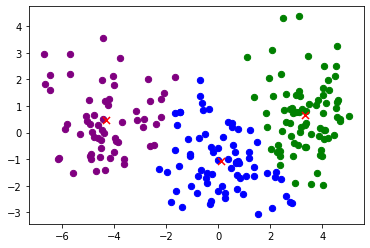

In [185]:
# new_X
centroids, cluster = kmeans(new_X, 3)
print('Centroids：{}'.format(centroids))
print('-----------------------------------------------------------------------')
for i in range(3):
    print('Cluster{}:{}'.format(i, cluster[i]))
    print('-----------------------------------------------------------------------')

color_list = ['green', 'blue', 'purple']    
for i in range(3):
    clus = cluster[i]
    color = color_list[i]
    for point in clus:
        plt.scatter(point[0],point[1], marker = 'o',color = color, s = 40, label = '原始点')
    
for i in range(len(centroids)):
    plt.scatter(centroids[i][0],centroids[i][1],marker='x',color='red', s=50,label='质心')

plt.show()
# for i in range(len(centroids)):
#     plt.scatter(centroids[i][0],centroids[i][1],marker='x',color=color_list[i], s=50,label='质心')

In [186]:
#P2
# Silhouette Coefficient
#-------------------------------------------------------------
k = 3
distance_list, sort_distance_index = cal_dis(new_X, centroids, k)
s_sum = 0

for i in range(new_X.shape[0]):
    s_data = new_X[i]
    smallest_index = sort_distance_index[i][0]
    second_index = sort_distance_index[i][1]
    
    a_s_sum = 0
    b_s_sum = 0
        
    # a
    for oth_point in cluster[smallest_index]:
        a_s_sum += np.linalg.norm(s_data - oth_point)
    a_s = a_s_sum/len(cluster[smallest_index])
        
    # b
    for oth_point in cluster[second_index]:
        b_s_sum += np.linalg.norm(s_data - oth_point)
    b_s = b_s_sum/len(cluster[second_index])
    
    s_s = (b_s-a_s)/max(a_s, b_s)
    s_sum += s_s

s = s_sum/new_X.shape[0]
print(s)

0.4875992369330414


In [187]:
a = 0
b = 0
label = txtDF[txtDF.columns[-1]]
for i in range(new_X.shape[0]):
    for j in range(i+1, new_X.shape[0]):
        if sort_distance_index[i][0] == sort_distance_index[j][0] and label[i] == label[j]:
            a +=1
        elif sort_distance_index[i][0] != sort_distance_index[j][0] and label[i] != label[j]:
            b +=1

RI = 2* (a + b)/ (new_X.shape[0] * (new_X.shape[0] - 1))
print(RI)

0.8743677375256322
